# Modélisation probabiliste

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

np.set_printoptions(precision=2,suppress=True)

## Les limites de la modélisation avec une fonction cible

Nous présentons des exemples qui nous montrent les limitations des techniques d'apprentissage "déterministe" que l'on a vu précédemment.

### Densité discrète ou continue




### Densité discrète ou continue

La densité (ou vraisemblance) d'une variable    $Y$  est une fonction $L(y)$ qui vérifie :  
     
* Quand $Y\in \mathbb R^p$ est continue :
$$
\forall \phi \qquad \mathbf E[\phi(Y)] = \int_{\mathbb R^p}  \phi(y) L(y) \, dy
$$
Que l'on peut aussi écrire
$$
\mathbf P[Y\in  dy] = L(y)\,  dy
$$
* Quand $Y\in E$ est discret :
$$
\forall \phi \qquad  \mathbf E[\phi(Y)] = \sum_{y\in E}  \phi(y) L(y)   
$$
Que l'on peut aussi écrire
$$
\mathbf P[Y = y] = L(y)
$$
     



### Variation sur le bruit

Considérons ces deux jeux de données. Les $X_i$ étant en abscisse, et les $Y_i$ en ordonnées.



<img src="https://github.com/vincentvigon/public/blob/main/data/petitSigma.png?raw=true" width=400><img src="https://github.com/vincentvigon/public/blob/main/data/grandSigma.png?raw=true" width=400>


Dans les deux cas, il existe certainement un lien du type $Y=f^?(X)+Bruit$, et sans doute $f^?$ est une fonction affine. Ainsi, on choisit comme modèle :
$$
f_w(x) = w_0 + w_1 x
$$
Les techniques du cours précédent nous permettraient de trouver le meilleur couple $(\hat w_0,\hat w_1)$.   A vu d'œil, ce  couple serait le même pour deux jeux de données ci-dessus. Cependant, on voit qu'il y a une différence : le premier jeu de donnée est plus bruité que le second.  

Il est souvent intéressant de mesurer la variance du bruit ; cela quantifie la qualité des observations.


Pour cela, au lieu d'estimer un lien déterministe entre $X$ et $Y$,  on va  plutôt estimer la loi de $Y$ sachant $X=x$. Par exemple, on peut parier que :
$$
Y =   w_0 + w_1 X  +  \sigma \epsilon   \qquad \text{avec $\epsilon  \sim  \mathcal N(0,1)$ et $\sigma>0$}
$$
Autrement dit, la densité de $Y$ sachant $X=x$ est donnée par
$$
L_{w,\sigma}(y|x) = G_{\sigma}\Big(y- w_0-w_1x \Big)      \qquad           \text{avec }  G_\sigma(y)=  \frac 1 {\sigma \sqrt{2\pi}}  e^{- \frac {y^2} {2\sigma^2}}
$$
Il reste à trouver les meilleurs $w$ et $\sigma$. A suivre.





### Variable caché

Considérons  $(X,Y)$, avec $X$ surface d'un appartement et $Y$ prix d'un appartement.
Nos observations sont les suivantes~:


<img src="https://github.com/vincentvigon/public/blob/main/data/troisApparts.png?raw=true" width=600>

Question  :  Qu'est-ce qui pourrait expliquer de telles variations sur les prix ? L'appartenance à un quartier bien sûr !

Pour de telles données, on ne peut pas imaginer de fonction $f^?$ telle que $Y=f^?(X) + Bruit$. On pourrait par contre imaginer une fonction telle que $Y=f^?(X,Q)+Bruit$ où $Q$ est  le quartier, mais on ne nous nous a pas donnée $Q$ (on parle de variable cachée).


Donc avec les données dont on dispose, peut modéliser $Y$ ainsi :  
$$
Y =
\begin{cases}
w_{0}^0 +w_1^0 X + \sigma \epsilon \qquad &\text{avec proba } \frac 1 3\\
w_{0}^1 +w_1^1 X + \sigma \epsilon \qquad &\text{avec proba } \frac 1 3\\
w_{0}^2 +w_1^2 X + \sigma \epsilon \qquad &\text{avec proba } \frac 1 3
\end{cases}
$$
Ainsi la densité de $Y$ sachant $X=x$ serait :
$$
L_{w,\sigma}(y|x) =  \frac 1 3   G_{\sigma} ( y - w_0^0 - w_1^0 x   )  +   \frac 1 3   G_{\sigma} ( y - w_0^1 - w_1^1 x   )   +  \frac 1 3   G_{\sigma} ( y - w_0^2 - w_1^2 x   )    
$$
Les paramètre inconnus sont ici $\sigma$et la matrice $w$ de taille $[2,3]$.

Remarques : puisqu'on ne nous a pas fournis une variable visiblement très importante (le quartier des appartements), on a mis cette variable cachée en paramètre inconnu (c'est l'exposant dans le tenseur $w$). On demande à l'algorithme d'optimisation de faire au mieux avec ces inconnues supplémentaires : le meilleur couple de paramétre sera appelé $\hat w,\hat\sigma$, et la densité estimée sera $\hat L = L_{\hat w,\hat\sigma}$.


Bien entendu, on pourrait augmenter la flexibilité du modèle en supposons que le nombre d'appartements par quartier n'est pas le même, ou en supposant que le bruit par quartier n'est pas le même.  Mais il faut que cela soit vraiment nécessaire, car lorsqu'on a trop d'inconnue ...





### Et si on veut quand même faire de la prédiction

Ainsi, notre nouvel objectif est de trouver un $\hat L(y|x)$ qui décrive au mieux la loi de $Y$ sachant $X=x$.
Ensuite, on peut poser $\hat f(x) = \text{argmax}_y \hat L(y|x) $.   

Cette technique  repose  sur l'hypothèse que l'endroit le plus probable d'apparition d'une v.a., c'est l'argmax de sa densité. Mais ce n'est pas vrai en général :

<img src="https://github.com/vincentvigon/public/blob/main/data/maximumDensite.png?raw=true" width=400>


Heureusement, dans la nature, les densités ont des formes bien plus sages (ex: des gaussiennes).


Autre manière d'estimer: on peut  prendre l'espérance:
$$
\hat f(x) = \int y \, \hat L(y|x)
$$





## Distance cross-entropique


### Trouver la meilleure densité via une distance


Notre problème est donc de trouver une densité conditionnelle  ou vraisemblance   $\hat L(y|x)$ qui représente au mieux la distribution de $Y$ sachant $X=x$. On va rechercher cette densité dans une famille paramétrique  $\mathcal L=\{L_\theta : \theta \in \Theta \}$.

Pour trouver le meilleur élément de cette famille on peut prendre:
$$
\hat \theta =  \text{argmin} _{\theta\in \Theta}    \sum_{Train}  \text{dist} \Big( y_i,L_\theta ( \cdot | x_i  )     \Big )
$$
puis $\hat L = L_{\hat \theta}$.


Attention :    $\text{dist}$ est une distance entre une densité  $L$ et une observation $y_i$. La distance sera petite quand la densité charge beaucoup l'observation.


La distance la plus connue, pour le cas discret et continu est
$$
\text{dist}   \Big(  L  ,   y    \Big ) =H   \Big(    y ,  L   \Big )   = - \ln L(y)
$$






/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


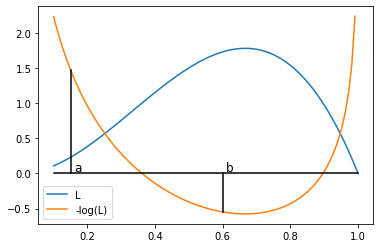

In [ ]:
#@title Cross Entropie
a=0.15
b=0.6
x=np.linspace(0.1,1,100)
L=lambda x : stats.beta.pdf(x,3,2)
_log_L=lambda x:-np.log(L(x))
plt.plot(x,L(x),label="L")
plt.plot(x,_log_L(x),label="-log(L)")
plt.plot([a,a],[0,_log_L(a)],"k")
plt.plot([b,b],[0,_log_L(b)],"k")
plt.plot(x,np.zeros_like(x),"k")
ep=0.01
plt.text(a+ep, 3*ep, "a", fontsize=12)
plt.text(b+ep, 3*ep, "b", fontsize=12)
plt.legend();

ci-dessus:
* $H(a,L)$ est grande: la densité $L$ est "éloignée" de $\delta_a$.
* $H(b,L)$ est petite (et même négative): la densité $L$ est "proche" de $\delta_b$.


### Cas discret


Dans le cas discret, quand $p$ et $q$ sont des probas, on écrit  généralement
$$
H  ( p,q ) =  -  \sum_v   p(v)   \ln q (v)
$$
Ainsi en notant $\delta_y$ la Dirac en $y$:
$$
H  (  y , L  ) =     H (  \delta_y,  L  )=  - \sum_v \delta_y(v)   \ln L(v)  =-\log L(y)  
$$
Attention, il y a deux notions proches: la divergence de Kullback–Leibler:
$$
D_{KL} ( p || q )  =  - \sum_v    p (v) \ln \frac{q(v)}{p(v)}  
$$
et l'entropie:
$$
H(p) = - \sum_v   p(v)  \ln p (v)
$$
qui sont reliés par
$$
H(p,q) = H(p) + D_{KL} ( p || q )
$$





### Construire $\hat L$ par maximum de vraisemblance

L'indépendance des observations, nous indique que la densité d'un échantillon $(Y_1,...,Y_n)$  sachant  $X_1=x_1,...,X_n=x_n$ est :
$$
 (y_1,...,y_n) \to  \prod_{Train}  L_{\theta} (y_i | x_i)
$$
Ainsi, quand  on observe $Train= [(y_1,x_1), ...,(y_n,x_n)] $, le paramètre $\theta$ qui rend ces observations les plus vraisemblables est  :
$$
\hat \theta = \text{argmax}_{\theta \in \Theta}   \prod_{Train}  L_{\theta} (y_i | x_i)
$$
 On doit estimer l'argmax d'un produit.   Comme on préfère les sommes, on passe le tout au logarithme. C'est une fonction croissante, donc :
$$
\hat \theta = \text{argmax}_{\theta \in \Theta}   \sum_{ Train}   \ln L_{\theta} (y_i | x_i)
$$
En mettant un signe moins devant :
$$
\hat \theta = \text{argmin} _{\theta \in \Theta}   \sum_{Train}    - \ln L_{\theta} (y_i | x_i) =\text{argmin} _{\theta \in \Theta}   \sum_{ Train} H \big(y_i ,   L_{\theta} ( \cdot  | x_i)      \big)
$$
Conclusion: maximiser la vraissemblance ou minimiser la distance cross-entropique, c'est idem.





### Exercice

Considérez le modèle linéaire gaussien avec le paramètre $\sigma =1$ :
$$
L_{w}(y|x) = G\Big(y- w_0-w_1x \Big)      \qquad           \text{avec }  G(y)=  \frac 1 {\sqrt{2\pi}}  e^{- \frac {y^2} {2}}
$$
Ecrire le problème de minimisation donné par le maximum de vraissemblance. Que constatez-vous ?


Plus dur: Refaites le même exo quand $\sigma$est inconnu :
$$
L_{w,\sigma}(y|x) = G_\sigma\Big(y- w_0-w_1x \Big)      \qquad           \text{avec }  G_\sigma(y)=  \frac 1 {\sigma \sqrt{2\pi}}  e^{- \frac {y^2} {2\sigma^2}}
$$
Le problème de minimisation obtenu admet une solution explicite $(\hat w, \hat \sigma)$, que l'on calcule en cherchant le lieu où la différentielle s'annule. Pour $\hat w$, on tombe sur l'estimateur déjà vu, pour $\hat \sigma$on tombe sur une formule naturelle qui est implémentée dans la classe du TP.  Si on n'aime pas calculer la différentielle, on peut aussi demander un algo d'optimisation de  trouver $(\hat w, \hat \sigma)$.



## Classification



### Construction générique

On se spécialise maintenant dans le cas où l'output $Y$ est qualitatif. Pour simplifier, on appellera les classes $\{1,2,....,k\}$.

Une densité  $L$ sur $\{1,2,....,k\}$ est assimilée au vecteur $[L(1),...,L(k)] \in \mathbb R^k$, vecteur positif dont la somme fait 1.


On considère  les variables explicatives $X=(X^1,...,X^p)$.  


Définissons la fonction softmax:
$$
 \Big ( \mathtt{SM}     (  V)  \Big)_y    =   \frac{ e^{V_y} }{\sum_u e^{V_u}}
$$
qui transforme tout vecteur $V$ en un vecteur de probabilité.


Pour construire un modèle paramètrique, commence par se donner une famille de fonction $f_\theta$ de $\mathbb R^p$ dans $\mathbb R^k$.  Puis, on définit:
$$
L_\theta (y  | x) =  \Big(\mathtt{SM} \circ f_\theta (x) \Big)_y
$$
La quasi-totalité des modèles de classification sont de la forme ci-dessus


Exo: caculer numériquement
$$
\mathtt{SM}(1,-3,10,1)
$$

Vocabulaire: le résultat du modèle avant le softmax: $f_\theta (x)$ est souvent appelé les "logits".



In [ ]:
import numpy as np
#@title Solution:
show=False #@param {type:"boolean"}
if show:
    V=[1,-3,10,1]
    print(np.exp(V)/np.sum(np.exp(V)))


### Régression logistique (ou softmax)

C'est le modèle de classification le plus simple:  le paramètre est $\theta= (w,b)$ avec $w$ une matrice $p\times k$ et $b$ un vecteur de taille $k$ et on choisit:
$$
f_{w,b}(x) = x \cdot w  + b  
$$
puis
$$
L_{w,b} (y  | x) =  \Big(\mathtt{SM} \circ f_{w,b} (x) \Big)_y
$$




### Ex: Réseau de neurone

Donnons un exemple de réseau de neurone classificateur dense (=fully-connected) à 2 couches (=1 couche d'entrée, 1 couche cachée, 1 couche de sortie).


On se donne une fonction non linéaire $\ell$, par exemple
     
* $\ell(x)=x 1_{x>0}$ la fonction relu.
* $\ell(x)=\tanh(x)$
* $\ell(x)= \frac{1}{1+e^{-x}}$ la sigmoïde.
     

Si $V$ est un vecteur, on note $\ell(V)$ l'application de $\ell$ à toutes les composantes de $V$.

On prend comme paramètre  $\theta= (w,b,w',b')$ composé de deux matrices et de vecteurs. Puis on choisit
$$
f_{\theta}(x) =       \ell (x \cdot w   + b)\cdot w' +b'
$$
puis
$$
L_{\theta} (y  | x) =  \Big(\mathtt{SM} \circ f_{\theta} (x) \Big)_y
$$
DESSIN


***A vous:*** Et maintenant le réseau suivant a combien de couche?
$$
f_{\theta}(x) =   \ell \Big(   \ell (x \cdot w   + b)\cdot w' +b' \Big)\cdot w'' +b''
$$
puis
$$
L_{\theta} (y  | x) =  \Big(\mathtt{SM} \circ f_{\theta} (x) \Big)_y
$$


Voici une implémentation du réseau à une couche.

***À vous:*** Implémenter le réseau plus complexe. Pour les dimensions qui ne sont pas précisées, choisissez!

In [ ]:
import numpy as np
p=5
k=2
w=np.random.normal(size=[p,k])
b=np.ones(shape=[k])
ell=np.tanh

def f_theta(x):
    return ell(x@w+b)

x=np.ones([p])
f_theta(x)

array([0.62709948, 0.93831214])


### Classifier


Ça y est: vous avez trouvé une bonne vraisemblance $L_{\hat w}$ pour décrire vos données.  

Maintenant, on vous donne une nouvelle entrée $x_o$. Pour prédire la sortie correspondante, le plus naturel, c'est de prendre la classe qui a la plus grande probabilité:
$$
y_o = \text{argmax}_y  L_{\hat w}(y|x_o)
$$


Cependant, toutes les classes n'ont pas la même importance. Imaginons que nous cherchons à repérer des malades en vue de les soigner.  La classe $1$ (ou positif)  étant "Malade", et la classe $0$ (ou négatif) étant "sain".  Supposons que  
$$
L_{\hat w}( \cdot | x_o)= [ 0.52 , 0.48    ]
$$
Dans ce cas-là, il vaut  peut-être mieux classer le sujet "malade" pour le soigner par précaution.


En classification binaire (2 classes),  on a inventé de  nombreux outils pour choisir le bon seuil de probabilité: courbe ROC, score AUC, score F1.

En classification multi-classe, on analyse surtout la matrice de confusion.

On verra tout cela dans les T.P.





### Exo


Dans cette partie, nous nous plaçons dans le cas le plus simple où il y a deux descripteurs $p=2$ et deux classes $k=2$. On considère un modèle logistique  que l'on a entrainée avec des données $Train$.  On a obtenu des paramètres $(\hat w,\hat b)$ optimaux.

On choisit ensuite de classifier un individu par la méthode la plus simple:
$$
\hat y_o=1    \Leftrightarrow L_{\hat w}(1  | x_o) > L_{\hat w}(0  | x_o) \Leftrightarrow L_{\hat w}(1  | x_o) >0.5
$$
À quoi ressemble la frontière de décision, c.à-d. la limite entre les $x\in \mathbb R^2$ dont la classe prédite est 0 et ceux dont la classe prédite est 1.

Même question si maintenant $k=3$.




### Correction

$$
L(\cdot |x) = \mathtt{SM}(x\cdot w + b )
$$
Donc
$$
L(0 |x) = e^{(x\cdot w + b )_0} /cst
$$
$$
L(1 |x) = e^{(x\cdot w + b )_1} /cst
$$
Donc
$$
L(0 |x)>L(1 |x) \Leftrightarrow (x\cdot w + b )_0>(x\cdot w + b )_1
$$
Les applications:
\begin{align}
\mathbb R^2 &\to \mathbb R\\
x &\mapsto \mathbb (x\cdot w + b )_0\\
x &\mapsto \mathbb (x\cdot w + b )_1\\
\end{align}
se représente par des plans. Le lieu des $x$ où la première domine la seconde est donc un demi-espace dont la frontière est une droite.


Si on a 3 classes possibles, on a donc la concurence entre 3 plans
\begin{align}
\mathbb R^2 &\to \mathbb R\\
x &\mapsto \mathbb (x\cdot w + b )_0\\
x &\mapsto \mathbb (x\cdot w + b )_1\\
x &\mapsto \mathbb (x\cdot w + b )_2\\
\end{align}
Le lieu des $x$ où la première domine est donc typiquement un secteur angulaire (sauf cas très particulier).

Quand on a plus de classe, les zones de domination peuvent devnir plus complexe, mais la frontière de décision est toujours constituée de segments de droite.



